# Portugal Bank Marketing dataset:

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler    

## Load the dataset

In [2]:
df=pd.read_csv("bank.csv",sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##  Data wrangling

In [4]:
df.shape

(41188, 21)

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

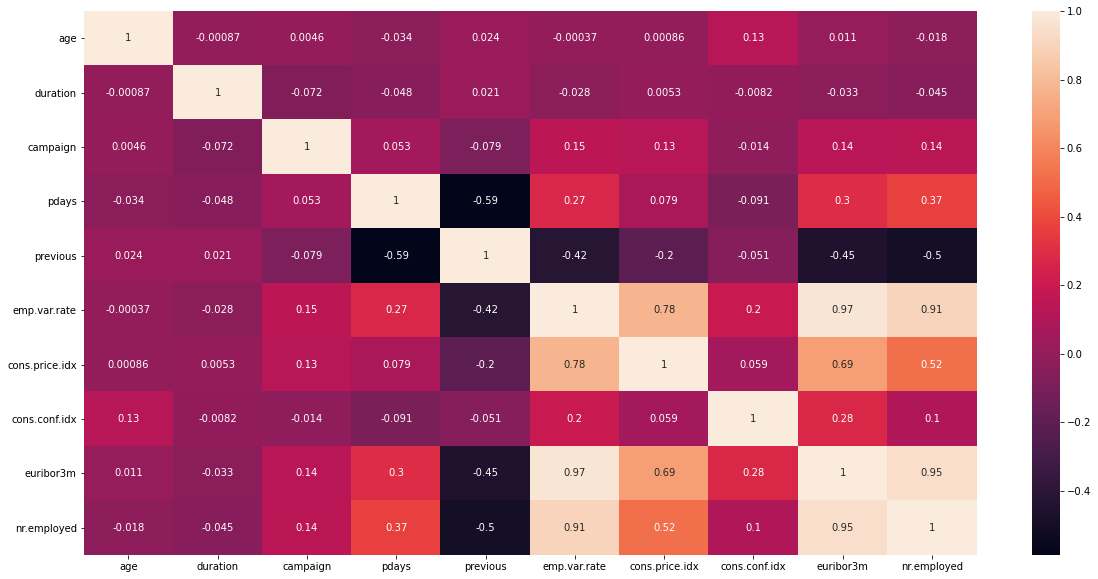

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

# Q1. What does the primary analysis of several categorical features reveal?

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
df_objects = df.select_dtypes(include=["object"])

In [12]:
df_objects

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].name,"-",df[col].isnull().sum())

job - 0
marital - 0
education - 0
default - 0
housing - 0
loan - 0
contact - 0
month - 0
day_of_week - 0
poutcome - 0
y - 0


In [14]:
for i in df_objects:
    a= df_objects.nunique()

In [15]:
a

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [16]:
for i in df_objects:
    b=df_objects[i].unique()
    print(i,":",b,"\n")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital : ['married' 'single' 'divorced' 'unknown'] 

education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default : ['no' 'unknown' 'yes'] 

housing : ['no' 'yes' 'unknown'] 

loan : ['no' 'yes' 'unknown'] 

contact : ['telephone' 'cellular'] 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome : ['nonexistent' 'failure' 'success'] 

y : ['no' 'yes'] 



# Q2. Perform the following Exploratory Data Analysis tasks:
#### a. Missing Value Analysis
#### b. Label Encoding wherever required
#### c. Selecting important features based on Random Forest
#### d. Handling unbalanced data using SM/OTE
#### e. Standardize the data using the anyone of the scalers provided by sklearn

#### Missing value analysis

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There are no missing values 

### Label Encoding

#### Encoding all the categorical using label encoding

In [18]:
category_features = df.select_dtypes(include=['object']).columns.values
for col in category_features:
    print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


#### These are the categorical columns 

In [19]:
cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [20]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### All the categorical columns has been encoded

### Selecting important features based on Random Forest

In [22]:
x=df.drop(['y'],axis=1)
y=df.y

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100))
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [25]:
select.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True])

In [26]:
selected_feat= X_train.columns[(select.get_support())]
len(selected_feat)

4

In [27]:
print(selected_feat)


Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


#### These are the important features  ['age', 'duration', 'euribor3m', 'nr.employed']

### Handling unbalanced data using SMOTE

In [28]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [29]:
sm = SMOTE(random_state = 2)

In [30]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [31]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 3252
Before OverSampling, counts of label '0': 25579 



In [32]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 25579
After OverSampling, counts of label '0': 25579


### Standardize the data using the anyone of the scalers provided by sklearn

#### Standardizing the data using standard scaler

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test) 

# Q3. Build the following Supervised Learning models:
#### a. Logistic Regression
#### b. AdaBoost
#### c. Naïve Bayes
#### d. KNN
#### e. SVM

## Making the models

In [34]:
x=df[['age', 'duration', 'euribor3m', 'nr.employed']]
y=df.y

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test) 

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
model.score(X_train,y_train)*100

90.20845617564427

In [39]:
model.score(X_test,y_test)*100

90.6611637128753

### Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [41]:
ada.score(X_train,y_train)*100

90.30210537268913

In [42]:
ada.score(X_test,y_test)*100

90.72590434571498

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nav=GaussianNB()
nav.fit(X_train,y_train)

GaussianNB()

In [44]:
nav.score(X_train,y_train)*100

88.69966355658839

In [45]:
nav.score(X_test,y_test)*100

89.38253621429149

### K-Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn.score(X_train,y_train)*100

92.74738996219347

In [48]:
knn.score(X_test,y_test)*100

90.12705349194789

### Support Vector Machine

In [49]:
from sklearn.svm import SVC
sup=SVC()
sup.fit(X_train,y_train)

SVC()

In [50]:
sup.score(X_train,y_train)*100

90.75994589157504

In [51]:
sup.score(X_test,y_test)*100

91.08197782633324

# Indian Onion Market

In [52]:
onion=pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
onion

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [53]:
onion.shape

(10227, 10)

In [54]:
onion.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [55]:
onion.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [56]:
df=pd.concat([onion.date,onion.priceMod],axis=1)

In [57]:
df.set_index('date')

,priceMod
date,
January-2005,446
January-2006,563
January-2010,1460
January-2011,3433
January-2012,605
...,...
December-2011,526
December-2012,1136
December-2013,1177
